In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# massIVE-KB

In [2]:
df_test = pd.read_csv('/data/2021_SJH_detectability/data_human/test_AP3.csv')

print(df_test.shape)

df_test.head(2)

(170706, 30)


,miss,314,4,108,1,90,digestibility,166,51,530,...,241,88,49,421,48,115,197,240,313,label
0,0,0.62,0.0,2.0,1.0,25.67,0.040944,0.0,8.0,5.24,...,11.86,-3.5,34.0,67.68,9.0,10.5,230.69,-7.42,-1.25,True
1,0,2.14,0.0,1.0,0.0,10.64,0.019842,0.0,2.0,1.68,...,3.62,-1.3,10.0,66.72,1.0,10.7,98.42,3.37,4.13,True


In [3]:
print('Loading model...')
model = joblib.load("log/model_AP3_detectability.joblib")
print('Loading input peptides')
X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

Loading model...
Loading input peptides


Test AUC : 0.8677846449375992
              precision    recall  f1-score   support

       False     0.7828    0.7896    0.7862     86495
        True     0.7819    0.7749    0.7784     84211

    accuracy                         0.7824    170706
   macro avg     0.7824    0.7823    0.7823    170706
weighted avg     0.7824    0.7824    0.7824    170706



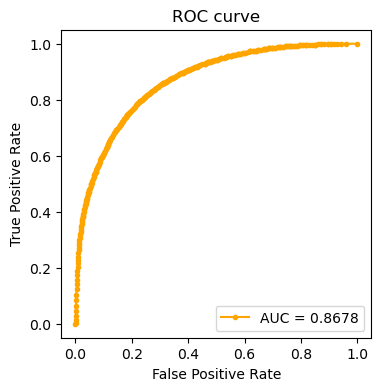

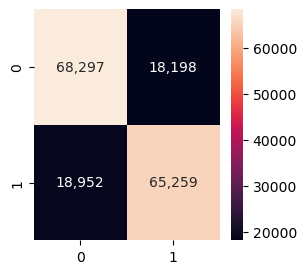

In [4]:
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, probs)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

In [5]:
np.save('log/result_AP3_fpr.npy', fpr)
np.save('log/result_AP3_tpr.npy', tpr)

In [5]:
np.save('log/result_massivekb_ypred_ap3.npy', np.array(y_pred))
np.save('log/result_massivekb_yprob_ap3.npy', np.array(probs))
np.save('log/result_massivekb_ytrue_ap3.npy', np.array(y_test))

# Case of cleavage sites count

In [6]:
miss0_idx = df_test.miss==0
miss1_idx = df_test.miss==1
miss2_idx = df_test.miss==2

Test AUC : 0.8777634219389912
              precision    recall  f1-score   support

       False     0.7853    0.5632    0.6559     10970
        True     0.8888    0.9578    0.9220     40007

    accuracy                         0.8729     50977
   macro avg     0.8371    0.7605    0.7890     50977
weighted avg     0.8666    0.8729    0.8648     50977



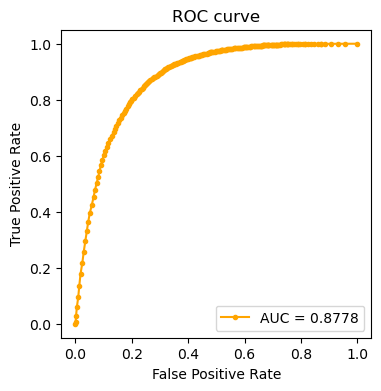

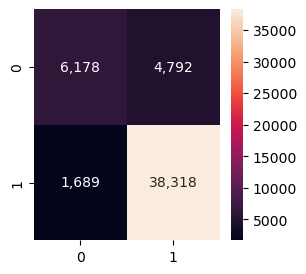

Test AUC : 0.7593028443953184
              precision    recall  f1-score   support

       False     0.7211    0.6064    0.6588     31745
        True     0.6736    0.7759    0.7212     33229

    accuracy                         0.6931     64974
   macro avg     0.6974    0.6912    0.6900     64974
weighted avg     0.6968    0.6931    0.6907     64974



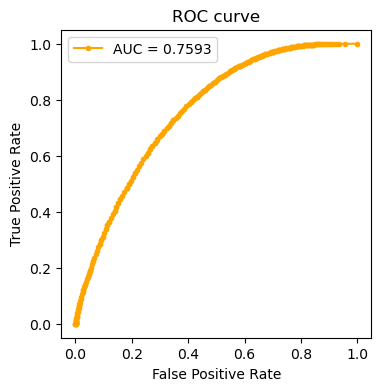

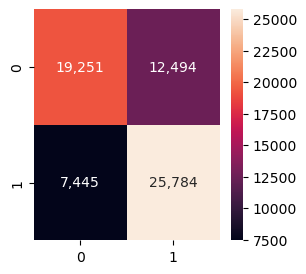

Test AUC : 0.7483181219828695
              precision    recall  f1-score   support

       False     0.8137    0.9792    0.8888     43780
        True     0.5592    0.1054    0.1774     10975

    accuracy                         0.8040     54755
   macro avg     0.6864    0.5423    0.5331     54755
weighted avg     0.7627    0.8040    0.7462     54755



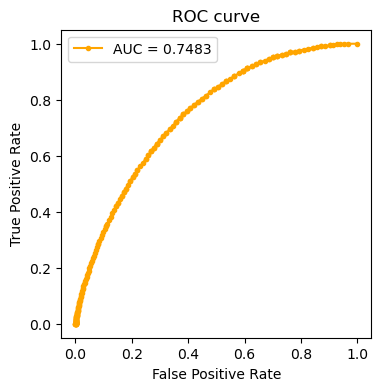

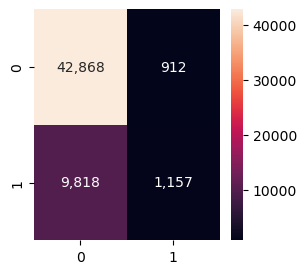

In [7]:
y_pred = np.array(y_pred)
probs_miss0 = probs[miss0_idx]
probs_miss1 = probs[miss1_idx]
probs_miss2 = probs[miss2_idx]
y_pred_miss0 = y_pred[miss0_idx]
y_pred_miss1 = y_pred[miss1_idx]
y_pred_miss2 = y_pred[miss2_idx]
y_test_miss0 = y_test[miss0_idx]
y_test_miss1 = y_test[miss1_idx]
y_test_miss2 = y_test[miss2_idx]

auc = roc_auc_score(y_test_miss0, probs_miss0)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test_miss0, y_pred_miss0, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test_miss0, probs_miss0)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test_miss0, y_pred_miss0)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

auc = roc_auc_score(y_test_miss1, probs_miss1)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test_miss1, y_pred_miss1, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test_miss1, probs_miss1)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test_miss1, y_pred_miss1)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

auc = roc_auc_score(y_test_miss2, probs_miss2)
print('Test AUC : {}'.format(auc))
print(classification_report(y_test_miss2, y_pred_miss2, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, _ = roc_curve(y_test_miss2, probs_miss2)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test_miss2, y_pred_miss2)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

